## NASA Turbo Fan DataSet - Prediction of Remaining Useful Life

Data Set - FD001

Units - 100
Operating Condition - 1
Fault Condition 1

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setting the path to the data directory
data_dir=os.path.join(os.getcwd(),'data')
data_dir

'C:\\Users\\jbhsm\\iNeuron_Project\\data'

In [6]:
# Setting the columns names for the train and test dataset dataframe
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['sensor_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names
print(col_names)

['engine', 'cycle', 'setting_1', 'setting_2', 'setting_3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21']


In [4]:
# Loading the 1st Train set to understand the data
df_tr_FD_1=pd.read_csv(os.path.join(data_dir,"train_FD001.txt"),header=None,sep="\s+",names=col_names)
print(df_tr_FD_1.shape)
df_tr_FD_1.head()

(20631, 26)


,engine,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [5]:
# Loading the 1st Test Dataset
df_tst_FD_1=pd.read_csv(os.path.join(data_dir,"test_FD001.txt"),header=None,sep= "\s+",names=col_names)
print(df_tst_FD_1.shape)
df_tst_FD_1.head()

(13096, 26)


,engine,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


#### Thoughts

    * Train Dataset 20K Observations.
    * Test Dataset 13K Observations.

### Understanding the Train dataset

In [8]:
df_tr_FD_1["engine"].describe()

count    20631.000000
mean        51.506568
std         29.227633
min          1.000000
25%         26.000000
50%         52.000000
75%         77.000000
max        100.000000
Name: engine, dtype: float64

In [9]:
df_tr_FD_1[index_names].groupby('engine').max().describe()

,cycle
count,100.000000
mean,206.310000
std,46.342749
min,128.000000
25%,177.000000
50%,199.000000
75%,229.250000
max,362.000000


<AxesSubplot:xlabel='engine'>

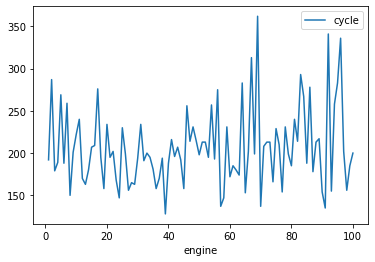

In [12]:
df_tr_FD_1[index_names].groupby('engine').max().plot()

#### Inference:
    1. We can see that there are total 100 units/engines in the discussion. 
    2. Mean and median for the engines do not coincide well, this may be due to the fact that cycle time for each engine is
        diffrent.
    3. If we see the cycle column, after filter the max cycle time for each engine, we can find that average max cycletime
        ranges betewen 199-205 cycles, with highest and lowest being 362 and 128 respectively.
    4. The standard deviation of 46 is quite large. 
    5. From the above plot we can see that vary substantially engine to engine.

In [13]:
# understanding the Setting features
df_tr_FD_1[setting_names].describe()

,setting_1,setting_2,setting_3
count,20631.000000,20631.000000,20631.0
mean,-0.000009,0.000002,100.0
std,0.002187,0.000293,0.0
min,-0.008700,-0.000600,100.0
25%,-0.001500,-0.000200,100.0
50%,0.000000,0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.008700,0.000600,100.0


### Inference:
    1. The standard deviation for setting 1 & 2 shows that it is not completely stable. The fluctuations are smnall.
    2. Setting 3, has no standard deviation, hence have no significance in determining the RUL. 

In [14]:
df_tr_FD_1[sensor_names].describe().T

,count,mean,std,min,25%,50%,75%,max
sensor_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
sensor_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
sensor_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
sensor_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
sensor_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
sensor_10,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.3000,1.3000,1.3000


In [15]:
df_des=df_tr_FD_1[sensor_names].describe().T
df_des.sort_values("std",ascending=False)[:5]

,count,mean,std,min,25%,50%,75%,max
sensor_9,20631.0,9065.242941,22.082880,9021.73,9053.100,9060.66,9069.420,9244.59
sensor_14,20631.0,8143.752722,19.076176,8099.94,8133.245,8140.54,8148.310,8293.72
sensor_4,20631.0,1408.933782,9.000605,1382.25,1402.360,1408.04,1414.555,1441.49
sensor_3,20631.0,1590.523119,6.131150,1571.04,1586.260,1590.10,1594.380,1616.91
sensor_17,20631.0,393.210654,1.548763,388.00,392.000,393.00,394.000,400.00


In [17]:
df_des.sort_values("std",ascending=True)

,count,mean,std,min,25%,50%,75%,max
sensor_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_19,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor_18,20631.0,2388.000000,0.000000e+00,2388.0000,2388.0000,2388.0000,2388.0000,2388.0000
sensor_10,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.3000,1.3000,1.3000
sensor_16,20631.0,0.030000,1.387812e-17,0.0300,0.0300,0.0300,0.0300,0.0300
sensor_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
sensor_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
sensor_15,20631.0,8.442146,3.750504e-02,8.3249,8.4149,8.4389,8.4656,8.5848
sensor_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
sensor_13,20631.0,2388.096152,7.191892e-02,2387.8800,2388.0400,2388.0900,2388.1400,2388.5600


### Inference:
        1. Sensors 1,10,18,19 - have 0 standard deviation. Hence can be easily discarded from our analysis.
        2. Sensors 5,6,16 - have very low fluctuation / std. This need further inspection.
        3. Sensors 9,14,4,3 - are the top 4 sensors showing high fluctuations.

In [18]:
grouped_by_engine = df_tr_FD_1.groupby("engine")
max_cycle=grouped_by_engine['cycle'].max()
max_cycle

engine
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: cycle, Length: 100, dtype: int64

In [19]:
import copy

In [20]:
train_df=copy.deepcopy(df_tr_FD_1)

In [21]:
## Addition of Remaining useful life against each cycle

def add_remaining_useful_life(df):
    # Getting total no. of cycles executed by each engine
    grouped_by_engine = df.groupby("engine")
    max_cycle=grouped_by_engine['cycle'].max()
    
    # Merge max_cycle into the orginal dataframe
    result_frame = df.merge(max_cycle.to_frame(name="max_cycle"),left_on="engine", right_index=True)
    
    #Calculating Remaining Useful life for each row
    remaining_useful_life= result_frame["max_cycle"] - result_frame["cycle"]
    result_frame["RUL"] = remaining_useful_life
    
    #dropping max_cycle
    result_frame.drop("max_cycle",axis=1,inplace=True)
    return result_frame   

In [22]:
train_df=add_remaining_useful_life(train_df)

In [23]:
train_df.head()

,engine,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [24]:
# In the below dataframe, the gradual decrease in RUL is shown  cycle increases.
train_df[index_names+['RUL']].head()

,engine,cycle,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


### Plotting

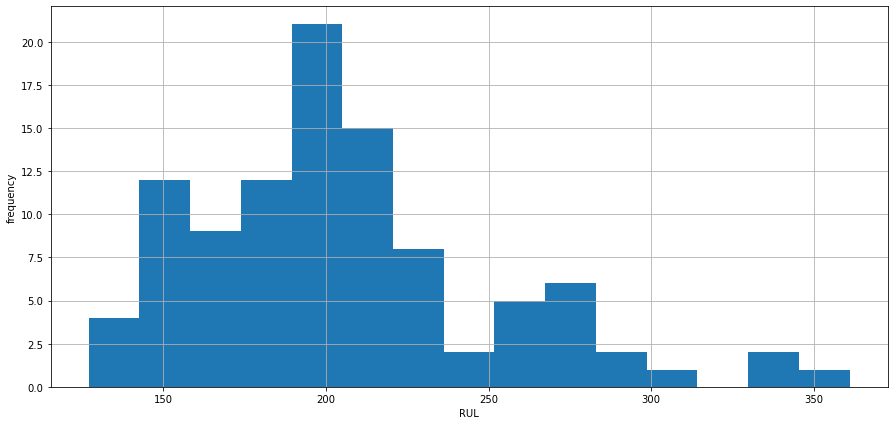

In [25]:
df_max_rul = train_df[['engine', 'RUL']].groupby('engine').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

### Inference:
    1. The histogram confirms that most engine break down around 200 cycles
    2. The distribution is right skewed, with few engines lasting over 300 cycles
    
### Plotting of sensors behaviour against the RUL
    1. There are 100 engines/units. For the purpose of interpretability of the graphs, we are considering 10 sensors, which are  multiple of 10.

In [26]:
def plot_fig(df,sensor_name):
    plt.figure(figsize=(13,5))
    for i in df['engine'].unique():
        if (i % 10 == 0):  # only plot every 10th unit_nr
            plt.plot('RUL', sensor_name, 
                     data=df[df['engine']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()

In [27]:
def plot_sensor(df,sensor_names):
    if isinstance(sensor_names,list):
        for sensor_name in sensor_names:
            plot_fig(df,sensor_name)
    elif isinstance(sensor_names,str):
        plot_fig(df,sensor_names)
    else:
        pass

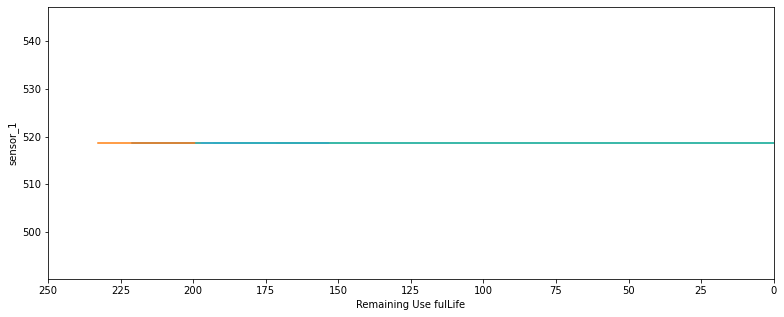

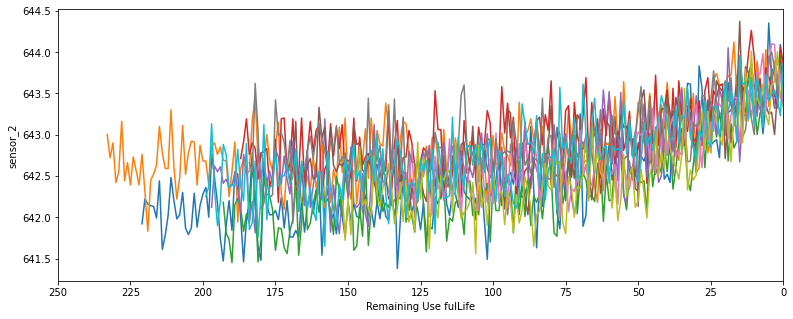

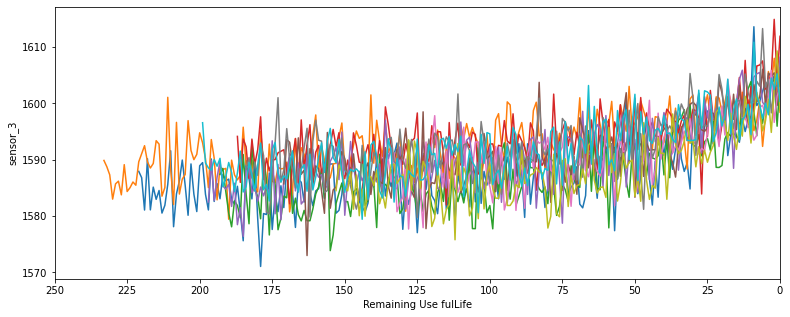

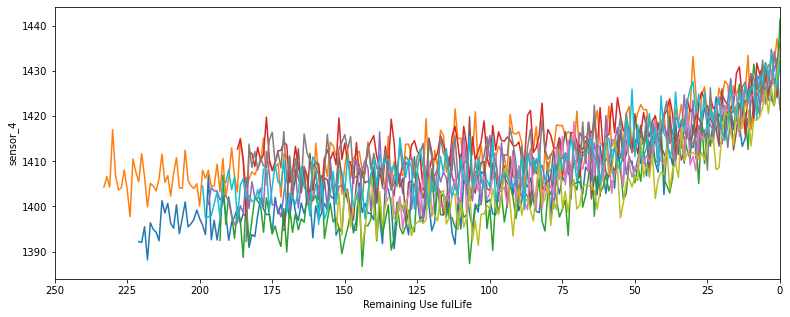

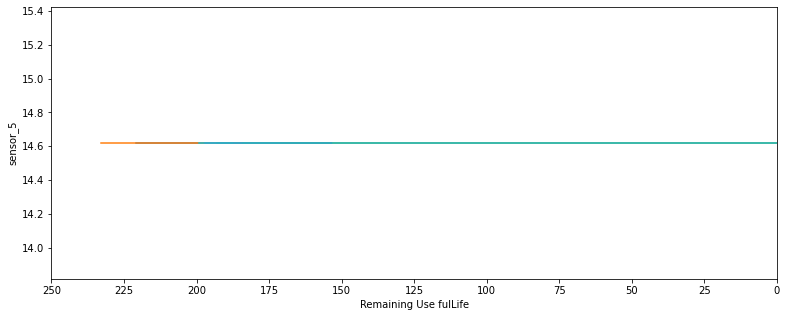

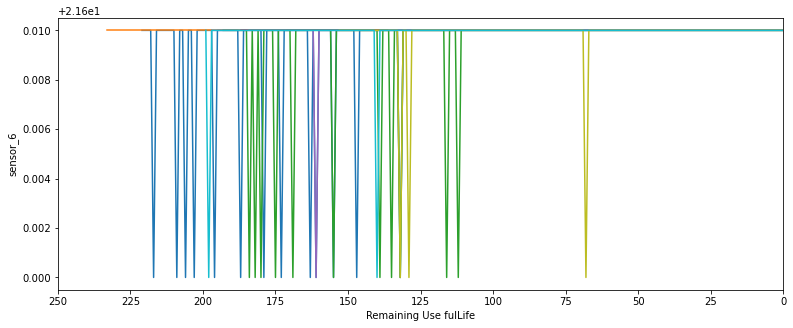

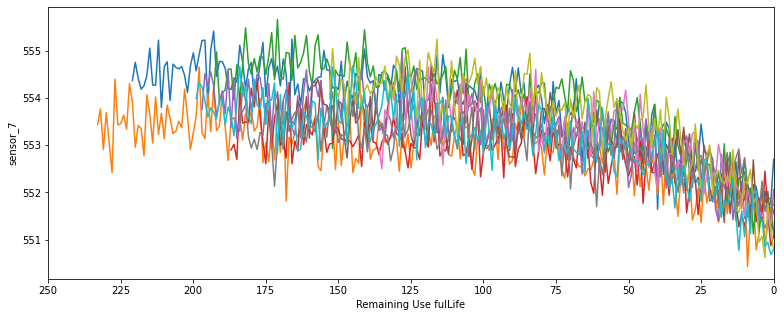

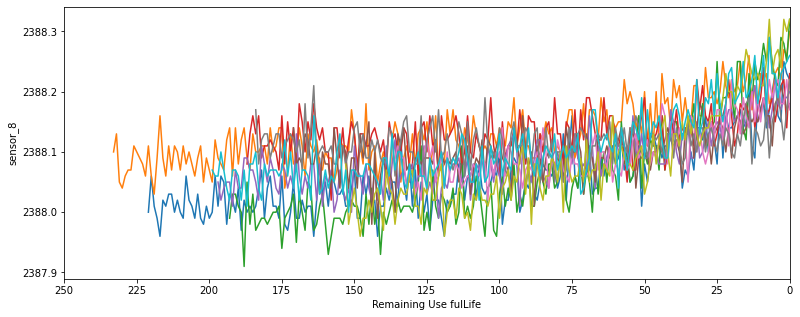

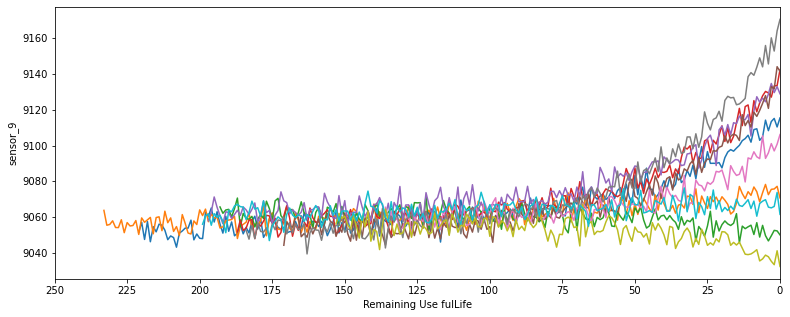

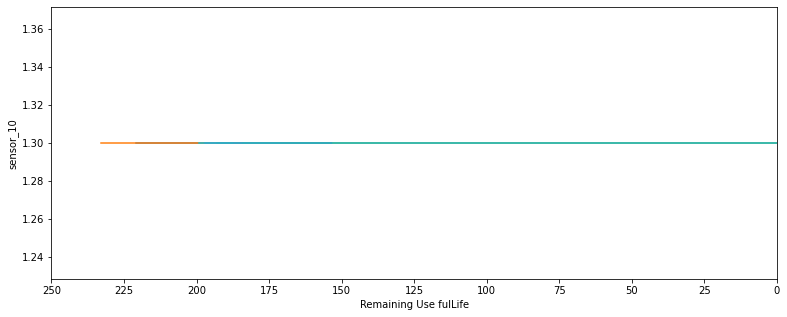

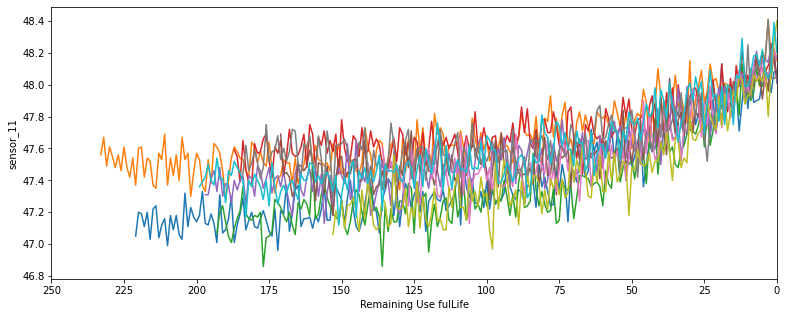

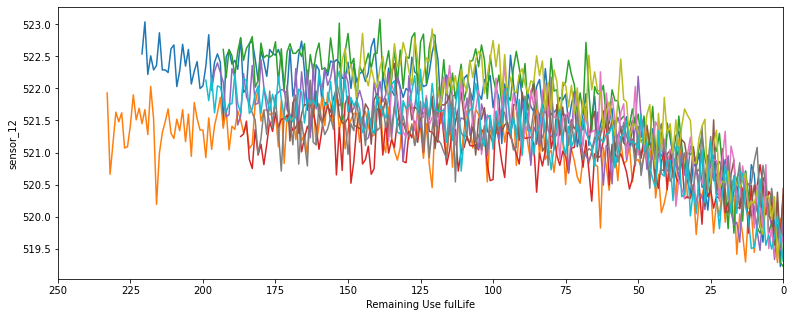

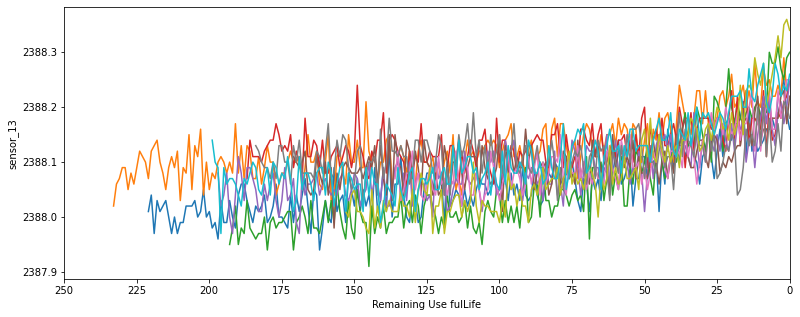

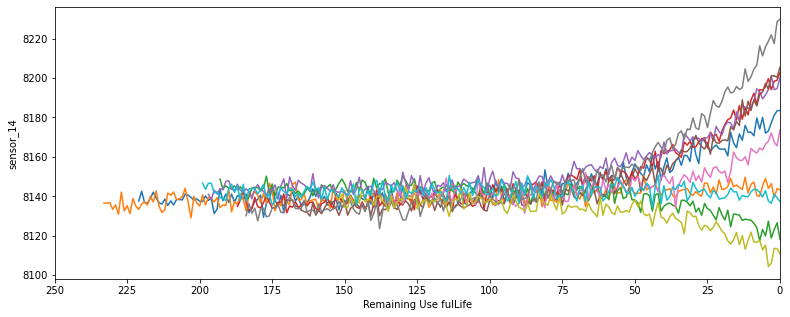

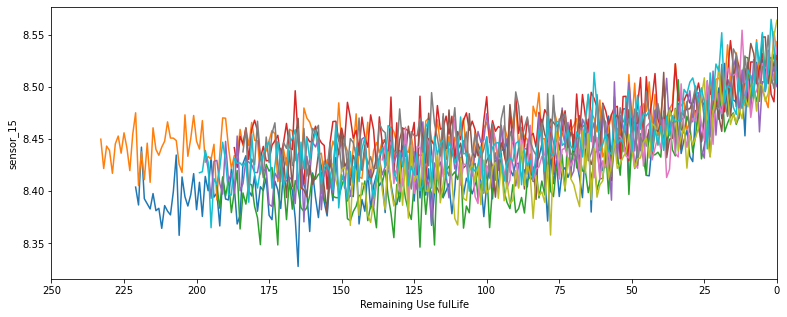

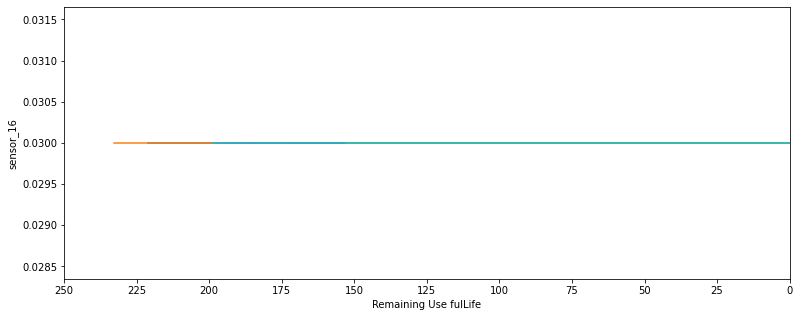

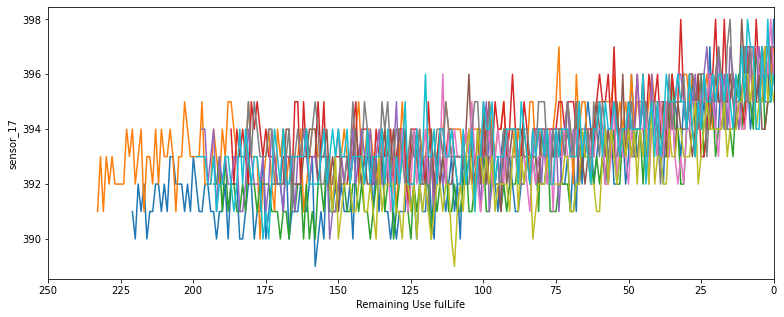

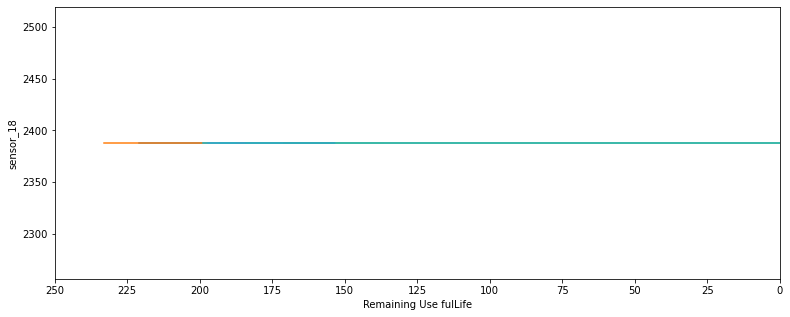

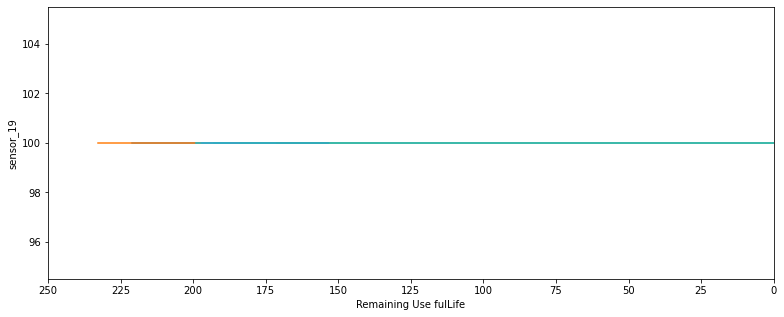

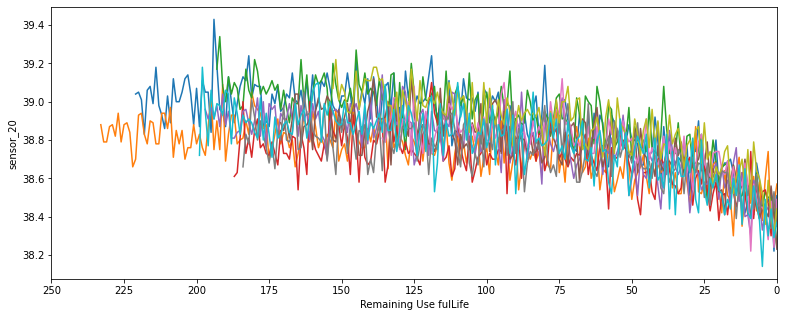

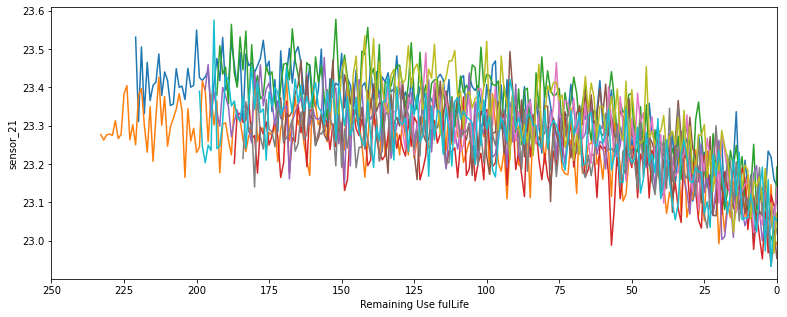

In [99]:
plot_sensor(train_df,sensor_names)

### Inference:
    1. Graphs 1,10,18,19 looks similar and with out any fluctuation or variation
    2. Sensors 5 & 16 also shows flat line, and can nbe included in the list of sensors to be excluded for our analysis
    3. Sensor 6, shows peak downward,and does't seem to have clear relation with decreasing RUL
    4. Sensors 2,3,4,8,11,13,15,17 have rising trend
    5. Sensors 7,12,20 and 21 have decreasing trend
    6. Sesors 9,14 which is having the highest standard deviation shows a unique behaviour, of having no variation with respect to RUL till a certain RUL, then showing diverging - both increasing and decreasing trend shown towards the end of life.
    

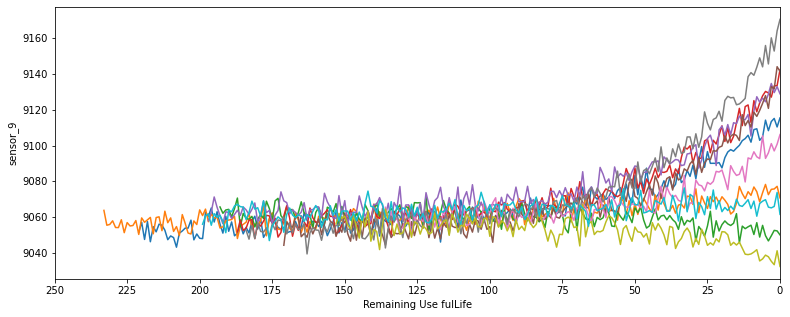

In [47]:
plot_sensor(train_df,"sensor_9")

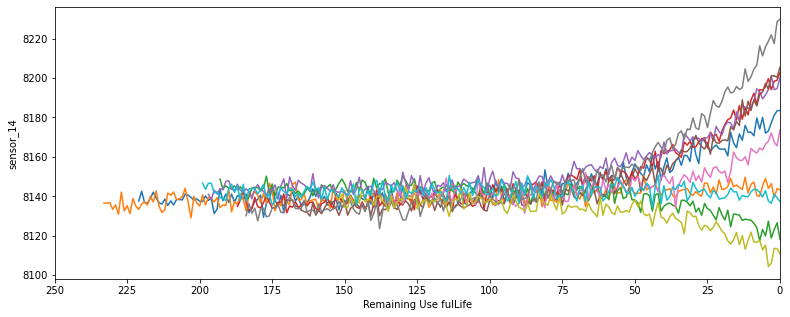

In [48]:
plot_sensor(train_df,"sensor_14")

## Baseline Linear Regression
    1. We'll include Root Mean Squared Error(RMSE)  as it will give an indication how many cycles the predictions are off on average
    2. Explained Vareiance (R2 Score) to indicate whart proportion of our dependent variable can be explained by the independent variables we use.
    

In [28]:
from sklearn.metrics import mean_squared_error,r2_score

In [29]:
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [30]:
drop_sensors = ['sensor_1','sensor_5','sensor_6','sensor_10','sensor_16','sensor_18','sensor_19']
drop_labels = index_names+setting_names+drop_sensors

In [31]:
X_train = train_df.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')

In [32]:
X_train.head()

,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [33]:
# Taking the last sensor values - since we have to predict the RUL for these values.
X_test=df_tst_FD_1.groupby('engine').last().reset_index().drop(drop_labels, axis=1)

In [34]:
X_test.head()

,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
0,642.58,1581.22,1398.91,554.42,2388.08,9056.40,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552
1,642.55,1586.59,1410.83,553.52,2388.10,9044.77,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618
2,642.88,1589.75,1418.89,552.59,2388.16,9049.26,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740
3,642.78,1594.53,1406.88,552.64,2388.13,9051.30,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581
4,642.27,1589.94,1419.36,553.29,2388.10,9053.99,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117


In [35]:
# Loading the RUL Values from data for evaluation of the model
df_RUL=pd.read_csv(os.path.join(data_dir,"RUL_FD001.txt"),header=None,sep= "\s+",names=['RUL'])

In [36]:
y_test=df_RUL['RUL'].values

### Setting up the model

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
# create and fit model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [39]:
# predict and evaluate
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

train set RMSE:44.66819159545431, R2:0.5794486527796758


In [40]:
y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

test set RMSE:31.952633027739513, R2:0.4087736807658261


In [41]:
## Normalizing the sensor reading and building the model again.
from sklearn.preprocessing import Normalizer

In [42]:
X_train_norm = Normalizer().fit_transform(X_train.values)
X_test_norm=Normalizer().fit_transform(X_test.values)

In [60]:
# create and fit model
lm = LinearRegression()
lm.fit(X_train_norm, y_train)

LinearRegression()

In [61]:
# predict and evaluate
y_hat_train_norm = lm.predict(X_train_norm)
evaluate(y_train, y_hat_train_norm, 'train')

train set RMSE:44.45840246708256, R2:0.5833897085167112


In [62]:
y_hat_test_norm = lm.predict(X_test_norm)
evaluate(y_test, y_hat_test_norm)

test set RMSE:32.8781918716041, R2:0.37402598276904386


In [46]:
### Clipping the RUL to 125
y_train_clipped = y_train.clip(upper=125)

In [47]:
# create and fit model
lm = LinearRegression()
lm.fit(X_train, y_train_clipped)

LinearRegression()

In [48]:
# predict and evaluate
y_hat_train = lm.predict(X_train)
evaluate(y_train_clipped, y_hat_train, 'train')

train set RMSE:21.491018701514893, R2:0.7340432868050575


In [49]:
y_hat_test= lm.predict(X_test)
evaluate(y_test, y_hat_test)

test set RMSE:21.90021340689466, R2:0.7222608196545189


#### Thoughts
    *  Clipping the RUL as per the tread observed, that machine health starts detoriating after a certain life.
    *  The value has been chosen to be 125
    *  Post normalization and clipping, test R2 score improved from 40% - 72% - a whooping 32% improvement.
    * Using Normalization - train set RMSE:44.45, R2:0.583, test set RMSE:32.87, R2:0.374
    *  Using scalling (MinMaxScaler)  train set RMSE:44.66, R2:0.579,test set RMSE:31.95, R2:0.408   

### Support Vector Regression

In [50]:
from sklearn.svm import SVR

In [51]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train_clipped)

# predict and evaluate
y_hat_train = svr.predict(X_train)
evaluate(y_train_clipped, y_hat_train, 'train')



train set RMSE:30.935591377378746, R2:0.448921080628116


In [52]:
y_hat_test = svr.predict(X_test)
evaluate(y_test, y_hat_test)

test set RMSE:33.009842780487034, R2:0.369002893795529


In [65]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
# SVM regression + clipped RUL + scaled
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train_clipped)

SVR(kernel='linear')

In [67]:
# predict and evaluate
y_hat_train = svr.predict(X_train_scaled)
evaluate(y_train_clipped, y_hat_train, 'train')

train set RMSE:21.578263975067884, R2:0.7318795396979634


In [68]:
y_hat_test = svr.predict(X_test_scaled)
evaluate(y_test, y_hat_test)

test set RMSE:21.580480163289625, R2:0.7303113540952153


### Thoughts:
     * There is 1% increase in R2 value

### Feature Engineering - Introducing Polynomial Features of Degree 2

In [69]:
from sklearn.preprocessing import PolynomialFeatures
# 2nd degree polynomialFeatures of [a, b] becomes [1, a, b, a^2, ab, b^2]
poly = PolynomialFeatures(2)
X_train_transformed = poly.fit_transform(X_train_scaled)
X_test_transformed = poly.fit_transform(X_test_scaled)

In [70]:
print(X_train_scaled.shape)
print(X_train_transformed.shape)

(20631, 14)
(20631, 120)


In [71]:
# SVM regression + clipped RUL + engineered features
svr_f = SVR(kernel='linear')
svr_f.fit(X_train_transformed, y_train_clipped)

SVR(kernel='linear')

In [72]:
# predict and evaluate
y_hat_train = svr_f.predict(X_train_transformed)
evaluate(y_train_clipped, y_hat_train, 'train')

train set RMSE:19.716789731130817, R2:0.7761436785704148


In [73]:
y_hat_test = svr_f.predict(X_test_transformed)
evaluate(y_test, y_hat_test)

test set RMSE:20.58540250837128, R2:0.7546086882115136


### Selecting the best Features from the exploded polynomial features

In [74]:
from sklearn.feature_selection import SelectFromModel

In [75]:
select_features = SelectFromModel(svr_f, threshold='mean', prefit=True)
select_features.get_support()
feature_names = poly.get_feature_names()


In [76]:
print('Original features:\n', X_train.columns)
print('Best features:\n', np.array(feature_names)[select_features.get_support()])
np.array(feature_names)[select_features.get_support()].shape

Original features:
 Index(['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
       'sensor_17', 'sensor_20', 'sensor_21'],
      dtype='object')
Best features:
 ['x0' 'x1' 'x2' 'x3' 'x5' 'x6' 'x7' 'x9' 'x10' 'x11' 'x12' 'x13' 'x2 x5'
 'x2 x8' 'x2 x9' 'x3 x5' 'x3 x8' 'x3 x9' 'x4^2' 'x4 x6' 'x4 x7' 'x4 x8'
 'x5^2' 'x5 x6' 'x5 x7' 'x5 x9' 'x5 x12' 'x5 x13' 'x6^2' 'x6 x8' 'x6 x9'
 'x7 x8' 'x7 x9' 'x8^2' 'x9^2' 'x9 x12' 'x9 x13']


(37,)

In [77]:
# SVM regression + clipped RUL + engineered features + selection
svr = SVR(kernel='linear')
svr.fit(X_train_transformed[:, select_features.get_support()], y_train_clipped)

SVR(kernel='linear')

In [78]:
# predict and evaluate
y_hat_train = svr.predict(X_train_transformed[:, select_features.get_support()])
evaluate(y_train_clipped, y_hat_train, 'train')

train set RMSE:19.74678910148112, R2:0.7754619593165271


In [79]:
y_hat_test = svr.predict(X_test_transformed[:, select_features.get_support()])
evaluate(y_test, y_hat_test)

test set RMSE:20.55613819605464, R2:0.7553058913450694


### Selection of Final Model

In [80]:
epsilon = [0.4, 0.3, 0.2, 0.1, 0.05]

for e in epsilon:
    svr = SVR(kernel='linear', epsilon=e)
    svr.fit(X_train_transformed[:, select_features.get_support()], y_train_clipped)
    
    # predict and evaluate
    y_hat = svr.predict(X_train_transformed[:, select_features.get_support()])
    mse = mean_squared_error(y_train_clipped, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_train_clipped, y_hat)
    print("epsilon:", e, "RMSE:", rmse, "R2:", variance)

epsilon: 0.4 RMSE: 19.74772556660335 R2: 0.7754406619776464
epsilon: 0.3 RMSE: 19.747580761069838 R2: 0.7754439552496151
epsilon: 0.2 RMSE: 19.746600078171713 R2: 0.7754662580123991
epsilon: 0.1 RMSE: 19.74678910148112 R2: 0.7754619593165271
epsilon: 0.05 RMSE: 19.74653245698401 R2: 0.7754677958176168


In [81]:
svr = SVR(kernel='linear', epsilon=0.2)
svr.fit(X_train_transformed[:, select_features.get_support()], y_train_clipped)

# predict and evaluate
y_hat_train = svr.predict(X_train_transformed[:, select_features.get_support()])
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test_transformed[:, select_features.get_support()])
evaluate(y_test, y_hat_test)

train set RMSE:19.746600078171713, R2:0.7754662580123991
test set RMSE:20.54412482077355, R2:0.7555918150093534


In [77]:
svr = SVR(kernel='linear', epsilon=0.05)
svr.fit(X_train_transformed[:, select_features.get_support()], y_train_clipped)

# predict and evaluate
y_hat_train = svr.predict(X_train_transformed[:, select_features.get_support()])
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test_transformed[:, select_features.get_support()])
evaluate(y_test, y_hat_test)

train set RMSE:19.74653245698401, R2:0.7754677958176168
test set RMSE:20.562280256823165, R2:0.7551596429978618


#### Thoughts

    * RMSE improved from 32.87 to 20.56 - 37.45% Improvement
    * R2 Score improved from 37.4% to 75.5% - 38% Improvement

* Study Reference

https://machinelearningmastery.com/data-preparation-without-data-leakage/